# Two Sum (two solutions)

*Michael Snowden*, 21 January 2024

This essay aims to solve the classic [Two
Sum](https://leetcode.com/problems/two-sum/) problem from [LeetCode](https://leetcode.com/). 

Readers should have an intermediate understanding of Python and familiarity
with Big-Oh notation to understand this essay.

## 1 Problem

Given an array of integers `nums` and an integer `target`, return indices of
the two numbers such that they add up to `target`.

 - $-109 \leq$ `nums[i]` $\leq 109$
 - $-109 \leq$ `target` $\leq 109$
 - Only one valid answer exists.

## 2 Algorithms

With our problem defined, the next step is to think of ways to solve it. This section
presents two approaches to solving Two Sum: brute force, and mapping.


### 2.1 Brute force

A brute force algorithm tries all possibilities, and selects the correct one.
For example, we can sum every number in `nums` with every other number and see
if our sum matches the `target`. If it does, then we have found our solution.

>**Brute force algorithm**: An outer loop iterates through each number in
>`nums`, then for each number, an inner loop iterates `nums` again. For each
>pair of numbers, if their indices are different and their sum matches `target`,
>return their indices.

Let _n_ = `len(nums)`, then this algorithm has two nested for loops that do _n_
iterations each. The operations performed within the inner loop are constant
time, meaning this solution will do at most _n_ $\times$ _n_ $\times$ O(1)
steps. Thus, the worst-case time complexity is O(_n_ $^2$). In the best case,
the first and second numbers in `nums` sum to `target`. No matter the size of
`nums`, the run-times would not increase. Therefore, the best-case time
complexity would be O(1).


### 2.2 Mapping

In the Brute force algorithm, we checked each pair of numbers in `nums` to see
if the resulting sum was equal to `target`. Since we are already checking every
number in the list, why not store some piece information from each number that
will help us find our matching pair?

For every number in `nums`, we can map the difference between it and the target
(`target` - number) to its corresponding index using a hashtable. This allows
us to check the hashmap for matching numbers in constant time.

>**Mapping algorithm**: For each number in `nums`, if its in the hashmap, return
>its index and the index mapped to it. Otherwise, calculate the difference
>(`target` - number) and map it to the corresponding index of number.

Let _n_ = `len(nums)`, then this algorithm has a single loop that does _n_
iterations. Because we are using a hashmap, all the operations performed in the
loop are done in constant time. Thus, our mapping algorithm has O(_n_) time
complexity in in the worst-case. Similar to the brute force approach, if the
correctly summing numbers are in the first two positions of `nums`, then the
run-times will be unaffected by increasing input sizes, giving a best-case
complexity of O(1).

## 3 Code

In this section we will implement and test the algorithms

In [1]:
from algoesup import test, time_functions, time_cases

%pytype on
%ruff on
%allowed on

pytype was activated
ruff was activated
allowed was activated


### 3.1 Testing

We now start thinking about writing some unit tests for our solutions.

To thoroughly test these solutions, we need to consider edge cases alongside
other important functional tests. For the Two Sum problem, we should test the
minimum size for `nums` and also the extremes of the values that can be
present. We should include negative numbers and zero in our tests because
integers are present in the inputs.

In [2]:
two_sum_tests = [
    ["minimum size for nums", [1, 2], 3, (0, 1)],
    ["non-adjacent indices", [1, 4, 9, 7], 8, (0, 3)],
    ["first two elements", [5, 7, 1, 2, 8], 12, (0, 1)],
    ["last two elements", [1, 3, 5, 7, 8], 15, (3, 4)],
    ["repeated elements", [6, 2, 3, 2], 4, (1, 3)],
    ["max and min range", [-109, 109, 0], 0, (0, 1)],
    ["lowest target value", [-50, 1, -59], -109, (0, 2)],
    ["highest target value", [50, 1, 59], 109, (0, 2)],
]

### 3.2 Implementations

The next cell implements the brute force algorithm using nested `for` loops

In [3]:
def two_sum_bf(nums: list, target: int) -> tuple[int, int]:
    """Given a list of integers return the indices of the pair that sums to target.

    Preconditions:
        len(nums) >= 2
        -109 <= nums[i] <= 109
        -109 <= target <= 109
        Exactly one pair a and b in nums has a + b = target
    """
    for index_1 in range(len(nums)):
        for index_2 in range(len(nums)):
            if index_1 != index_2 and nums[index_1] + nums[index_2] == target:
                return index_1, index_2
    return (-1, -1)


test(two_sum_bf, two_sum_tests)

Testing two_sum_bf:
Tests finished.


Next up is the mapping algorithm implemented using Python's `dict`.

In [4]:
def two_sum_map(nums: list, target: int) -> tuple[int, int]:
    """Given a list of integers return the indices of the pair that sums to target.

    Preconditions:
        len(nums) >= 2
        -109 <= nums[i] <= 109
        -109 <= target <= 109
        Exactly one pair a and b in nums has a + b = target
    """
    differences: dict[int, int] = {}
    for index in range(len(nums)):
        difference = target - nums[index]
        if nums[index] in differences:
            return differences[nums[index]], index
        differences[difference] = index
    return (-1, -1)


test(two_sum_map, two_sum_tests)

Testing two_sum_map:
Tests finished.


**allowed** found issues:
- 10: unknown construct

## 4 Performance

In this section we will measure the run-times of our solutions under various conditions to see if
our analysis matches empirical data.

### 4.1 generating inputs

Since the functions that time the code require an input generators, we must
write the generator first. The worst-case complexity is often the most useful,
so here we write a function that generates a worst case instance by locating
the matching pair of numbers at the end of `nums`.

In [5]:
import random

def worst(size: int) -> tuple[list[int], int]:
    """Given a size, generate a problem instance for two sum.

    Preconditions: size >= 2; scenario in {"best", "normal", "worst"}
    """
    num1 = random.randint(-109, 109)
    num2 = random.randint(-109, 109)
    target = num1 + num2
    nums = [num1, num2]
    while len(nums) < size:
        new_num = random.randint(-109, 109)
        valid = True
        for num in nums:
            if target - new_num == num:
                valid = False
        if valid:
            nums.append(new_num)
    nums = nums[2:] + nums[:2]
    return nums, target

**allowed** found issues:
- 8: random.randint
- 9: random.randint
- 13: random.randint

### 4.2 Run-times for each solution

We now compare the runtimes for both solutions using the input generator for
the worst case.

Inputs generated by worst

Input size      two_sum_bf     two_sum_map 
       100           669.3             9.2 µs
       200          2660.1            21.0 µs
       400         10770.2            40.6 µs
       800         45877.3            75.1 µs
      1600        181893.9           150.2 µs

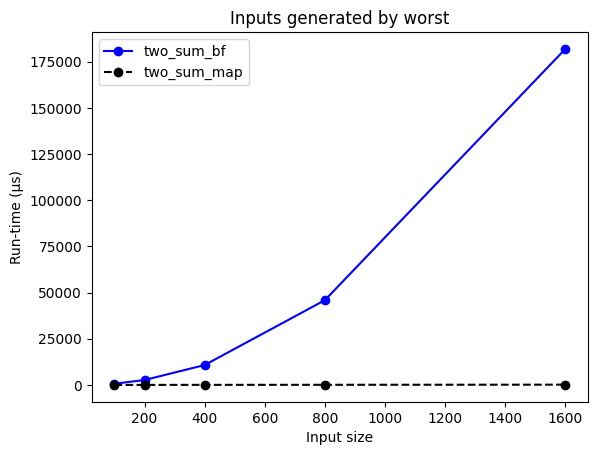

In [6]:
solutions = [two_sum_bf, two_sum_map]
time_functions(solutions, worst, start=100, double=4, chart=True)

The run-times for `two_sum_bf` almost instantly eclipse that of `two_sum_map`.
In this chart it looks as if the run-times for `two_sum_map` are not growing at
all, but we know this is false by observing the printed run times. Let us see
if we can modify the inputs of `time_functions` for a better visual
representation.

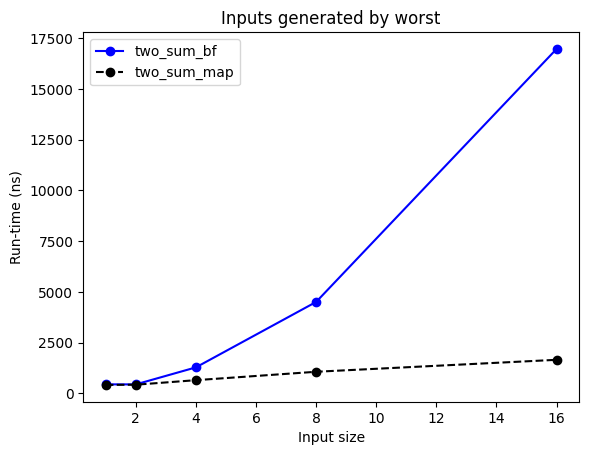

In [7]:
solutions = [two_sum_bf, two_sum_map]
time_functions(solutions, worst, start=1, double=4, text=False, chart=True)

The point at which the run-time growth rates two solutions start to diverge is
much clearer now. The brute force approach's run-times still accelerate off
into the stratosphere, but we can see the separation and trend of mapping
algorithm a lot better.

The run-times for the brute force algorithm approximately quadruple every time
the input size is doubled, confirming our prediction of a quadratic worst-case
time complexity. For the mapping algorithm, the pattern matches that of linear
time complexity; as we double the input size, our run-times also double.

## 5 Conclusion

We started this essay with the definition of the Two sum problem. Next, we
outlined two algorithms: brute force, and mapping, then analysed the time
complexity of each one. After that we implemented and tested our solutions
using Python, and in the penultimate section we used empirical testing to see
if our analysis matched the data. Now we must decide which of our algorithms is
best.

The brute force approach, unsurprisingly, is not very efficient when it comes
to run-times. We suspected this would be the case, then the empirical testing
confirmed it. Its only positive attributes were its simplicity and efficient
memory usage. 

In contrast, the time complexity of the mapping algorithm is reasonably
efficient, but this is achieved by using extra memory. space-time In the end,
the quadratic time complexity of the brute force algorithm cannot be ignored.
The small trade of space for time is worth it in this instance and therefore I
conclude the mapping algorithm is best.